In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import os
import tensorflow
import numpy as np
from keras import Sequential
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Type 1 of Finetuning

#### using VGG16 directly (with top layers included).

🔹 Type 1 – Direct Fine-Tuning with Top Layers 

Uses VGG16 with include_top=True (keeps ImageNet’s classifier head). Adds a final sigmoid layer for binary classification. 

👉 Quick transfer learning, but less flexible

In [2]:
vgg = VGG16(
weights='imagenet',
include_top = True,
input_shape=(224, 224, 3)

)

NameError: name 'VGG16' is not defined

In [ ]:
for layer in vgg.layers:
  print(f"{layer.name :<20} | Type: {type(layer).__name__:<20} | Trainable: {layer.trainable}")

input_layer          | Type: InputLayer           | Trainable: True
block1_conv1         | Type: Conv2D               | Trainable: True
block1_conv2         | Type: Conv2D               | Trainable: True
block1_pool          | Type: MaxPooling2D         | Trainable: True
block2_conv1         | Type: Conv2D               | Trainable: True
block2_conv2         | Type: Conv2D               | Trainable: True
block2_pool          | Type: MaxPooling2D         | Trainable: True
block3_conv1         | Type: Conv2D               | Trainable: True
block3_conv2         | Type: Conv2D               | Trainable: True
block3_conv3         | Type: Conv2D               | Trainable: True
block3_pool          | Type: MaxPooling2D         | Trainable: True
block4_conv1         | Type: Conv2D               | Trainable: True
block4_conv2         | Type: Conv2D               | Trainable: True
block4_conv3         | Type: Conv2D               | Trainable: True
block4_pool          | Type: MaxPooling2D       

In [ ]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(vgg)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
  directory = '/content/data/train',
  labels='inferred',
  label_mode = 'int',
  batch_size=32,
  image_size=(224, 224)
)

validation_ds = keras.utils.image_dataset_from_directory(
directory = '/content/data/val',
labels='inferred',
label_mode = 'int',
batch_size=32,
image_size=(224, 224)
)

Found 1999 files belonging to 2 classes.
Found 602 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image, label):
  image = tensorflow.cast(image/255. ,tensorflow.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, verbose=1)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5081 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 538ms/step - accuracy: 0.5337 - loss: 0.6905 - val_accuracy: 0.7907 - val_loss: 0.6828
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - accuracy: 0.7875 - loss: 0.6807 - val_accuracy: 0.8189 - val_loss: 0.6745
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 509ms/step - accuracy: 0.8601 - loss: 0.6716 - val_accuracy: 0.9419 - val_loss: 0.6669
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 544ms/step - accuracy: 0.9178 - loss: 0.6674 - val_accuracy: 0.9518 - val_loss: 0.6648
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 508ms/step - accuracy: 0.9506 - loss: 0.6647 - val_accuracy: 0.9452 - val_loss: 0.6649
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 546ms/step - accuracy: 0.9509 - loss: 0.6642 - val_accuracy: 0.9402 - val_loss: 0.6643
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 548ms/step - accuracy: 0.9652 - loss: 0.6629 - val_accura

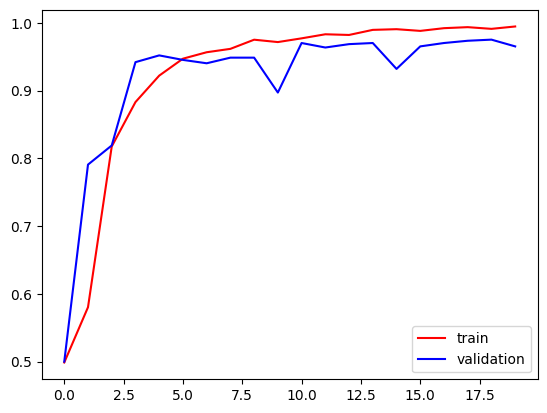

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


In [ ]:
# Path to one test image
img_path = '/content/data/test/cats/cat.2314.jpg'

# Load and preprocess .image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
# Predict
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
# Interpret result
label = "Dog" if prediction[0][0] > 0.5 else "Cat"
confidence = prediction[0][0]

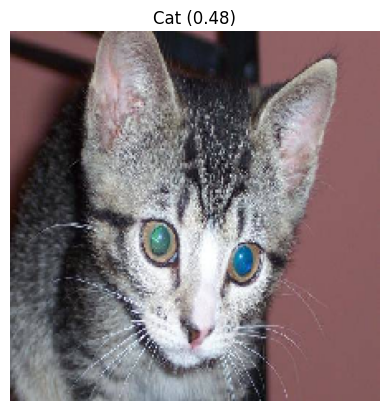

In [ ]:
# Show result
plt.imshow(img)
plt.title(f"{label} ({confidence :.2f})")
plt.axis('off')
plt.show()

## Type 2 of Finetuning

🔹 Type 2 – Feature Extraction with Custom Classifier 

Uses VGG16 with include_top=False (removes ImageNet’s classifier). Adds Flatten + Dense layers to build a new classifier for your dataset. 

👉 More adaptable to new tasks, only retrains the new head.

In [19]:
vgg_conv_base = VGG16(
  weights='imagenet',
  include_top = False,
  input_shape=(224, 224, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
for layer in vgg_conv_base.layers:
  print(f"{layer.name :<20} | Type: {type(layer).__name__:<20} | Trainable: {layer.trainable}")

input_layer_2        | Type: InputLayer           | Trainable: True
block1_conv1         | Type: Conv2D               | Trainable: True
block1_conv2         | Type: Conv2D               | Trainable: True
block1_pool          | Type: MaxPooling2D         | Trainable: True
block2_conv1         | Type: Conv2D               | Trainable: True
block2_conv2         | Type: Conv2D               | Trainable: True
block2_pool          | Type: MaxPooling2D         | Trainable: True
block3_conv1         | Type: Conv2D               | Trainable: True
block3_conv2         | Type: Conv2D               | Trainable: True
block3_conv3         | Type: Conv2D               | Trainable: True
block3_pool          | Type: MaxPooling2D         | Trainable: True
block4_conv1         | Type: Conv2D               | Trainable: True
block4_conv2         | Type: Conv2D               | Trainable: True
block4_conv3         | Type: Conv2D               | Trainable: True
block4_pool          | Type: MaxPooling2D       

In [21]:
vgg_conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model = Sequential()
model.add(vgg_conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 21,137,729 (80.63 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224, 224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224, 224)
)

Found 1999 files belonging to 2 classes.
Found 602 files belonging to 2 classes.


In [25]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image, label

In [26]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [27]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, verbose=1)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 602ms/step - accuracy: 0.7326 - loss: 0.5101 - val_accuracy: 0.9468 - val_loss: 0.1603
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 534ms/step - accuracy: 0.9470 - loss: 0.1495 - val_accuracy: 0.9585 - val_loss: 0.1181
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 499ms/step - accuracy: 0.9850 - loss: 0.0605 - val_accuracy: 0.9551 - val_loss: 0.0894
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 538ms/step - accuracy: 0.9926 - loss: 0.0313 - val_accuracy: 0.9651 - val_loss: 0.0900
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 497ms/step - accuracy: 0.9941 - loss: 0.0197 - val_accuracy: 0.9635 - val_loss: 0.0984
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 534ms/step - accuracy: 0.9933 - loss: 0.0226 - val_accuracy: 0.9751 - val_loss: 0.0683
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 534ms/step - accuracy: 0.9964 - loss: 0.0094 - val_accuracy: 0.9701 - val_loss: 0.0732
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 498ms/step - accuracy: 1.0000 - loss: 6.5487e-04 - val_

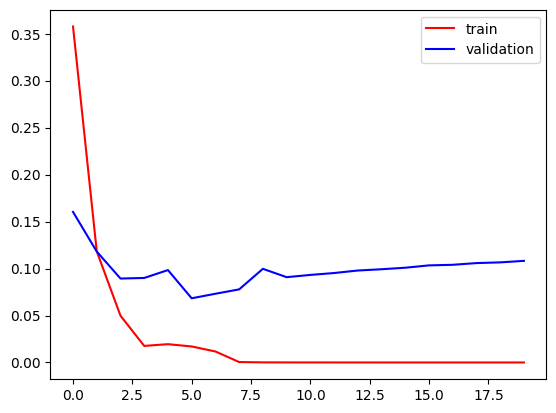

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


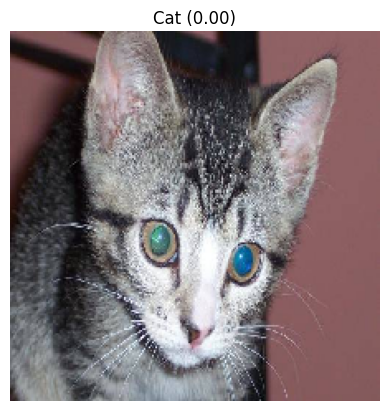

In [30]:
# Path to one test image
img_path = '/content/data/test/cats/cat.2314.jpg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
# Predict
prediction = model.predict(img_array)

# Interpret result
label = "Dog" if prediction[0][0] > 0.5 else "Cat"
confidence = prediction[0][0]

# Show result
plt.imshow(img)
plt.title(f"{label} ({confidence :.2f})")
plt.axis('off')
plt.show()

## Type 3 of Finetuning

🔹 Type 3 – Selective Fine-Tuning 

Starts like Type 2 (custom classifier). Then unfreezes some higher VGG16 conv layers for training. 

👉 Balances general ImageNet features with task-specific adaptation.

In [31]:
vgg_conv_base.layers

[<InputLayer name=input_layer_2, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [32]:
vgg_conv_base.trainable = True

In [33]:
vgg_conv_base.trainable

True

In [34]:
for layer in vgg_conv_base.layers:
    print(f"{layer.name:<20} | Type: {type(layer).__name__:<20} | Trainable: {layer.trainable}")

input_layer_2        | Type: InputLayer           | Trainable: True
block1_conv1         | Type: Conv2D               | Trainable: True
block1_conv2         | Type: Conv2D               | Trainable: True
block1_pool          | Type: MaxPooling2D         | Trainable: True
block2_conv1         | Type: Conv2D               | Trainable: True
block2_conv2         | Type: Conv2D               | Trainable: True
block2_pool          | Type: MaxPooling2D         | Trainable: True
block3_conv1         | Type: Conv2D               | Trainable: True
block3_conv2         | Type: Conv2D               | Trainable: True
block3_conv3         | Type: Conv2D               | Trainable: True
block3_pool          | Type: MaxPooling2D         | Trainable: True
block4_conv1         | Type: Conv2D               | Trainable: True
block4_conv2         | Type: Conv2D               | Trainable: True
block4_conv3         | Type: Conv2D               | Trainable: True
block4_pool          | Type: MaxPooling2D       

In [35]:
vgg_conv_base.trainable = False

In [36]:
vgg_conv_base.trainable

False

In [37]:
for layer in vgg_conv_base.layers:
    print(f"{layer.name:<20} | Type: {type(layer).__name__:<20} | Trainable: {layer.trainable}")

input_layer_2        | Type: InputLayer           | Trainable: False
block1_conv1         | Type: Conv2D               | Trainable: False
block1_conv2         | Type: Conv2D               | Trainable: False
block1_pool          | Type: MaxPooling2D         | Trainable: False
block2_conv1         | Type: Conv2D               | Trainable: False
block2_conv2         | Type: Conv2D               | Trainable: False
block2_pool          | Type: MaxPooling2D         | Trainable: False
block3_conv1         | Type: Conv2D               | Trainable: False
block3_conv2         | Type: Conv2D               | Trainable: False
block3_conv3         | Type: Conv2D               | Trainable: False
block3_pool          | Type: MaxPooling2D         | Trainable: False
block4_conv1         | Type: Conv2D               | Trainable: False
block4_conv2         | Type: Conv2D               | Trainable: False
block4_conv3         | Type: Conv2D               | Trainable: False
block4_pool          | Type: MaxPo

In [38]:
set_trainable = False   # start with all layers frozen

for layer in vgg_conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [39]:
for layer in vgg_conv_base.layers:
    print(f"{layer.name:<20} | Type: {type(layer).__name__:<20} | Trainable: {layer.trainable}")

input_layer_2        | Type: InputLayer           | Trainable: False
block1_conv1         | Type: Conv2D               | Trainable: False
block1_conv2         | Type: Conv2D               | Trainable: False
block1_pool          | Type: MaxPooling2D         | Trainable: False
block2_conv1         | Type: Conv2D               | Trainable: False
block2_conv2         | Type: Conv2D               | Trainable: False
block2_pool          | Type: MaxPooling2D         | Trainable: False
block3_conv1         | Type: Conv2D               | Trainable: False
block3_conv2         | Type: Conv2D               | Trainable: False
block3_conv3         | Type: Conv2D               | Trainable: False
block3_pool          | Type: MaxPooling2D         | Trainable: False
block4_conv1         | Type: Conv2D               | Trainable: False
block4_conv2         | Type: Conv2D               | Trainable: False
block4_conv3         | Type: Conv2D               | Trainable: False
block4_pool          | Type: MaxPo

In [40]:
model = Sequential()
model.add(vgg_conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224, 224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/data/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(224, 224)
)

Found 1999 files belonging to 2 classes.
Found 602 files belonging to 2 classes.


In [42]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image, label

In [43]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [44]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [49]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, verbose=1)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - accuracy: 1.0000 - loss: 2.1279e-05 - val_accuracy: 0.9718 - val_loss: 0.1052
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 230ms/step - accuracy: 1.0000 - loss: 2.1487e-05 - val_accuracy: 0.9718 - val_loss: 0.1057
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - accuracy: 1.0000 - loss: 1.9846e-05 - val_accuracy: 0.9718 - val_loss: 0.1064
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 1.0000 - loss: 1.8873e-05 - val_accuracy: 0.9718 - val_loss: 0.1068
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step - accuracy: 1.0000 - loss: 1.7928e-05 - val_accuracy: 0.9718 - val_loss: 0.1066
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step - accuracy: 1.0000 - loss: 1.6609e-05 - val_accuracy: 0.9718 - val_loss: 0.1070
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 1.0000 - loss: 1.6700e-05 - val_accuracy: 0.9718 - val_loss: 0.1070
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 259ms/step - accuracy: 1.00

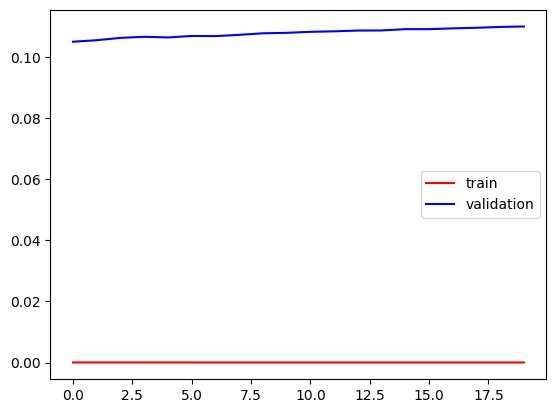

In [50]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


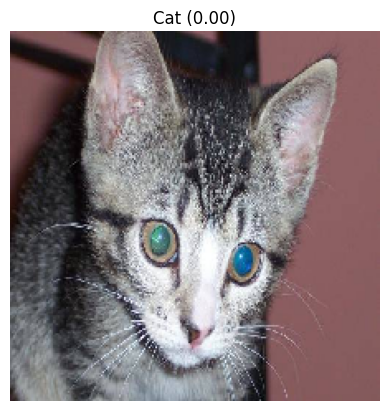

In [51]:
# Path to one test image
img_path = '/content/data/test/cats/cat.2314.jpg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
# Predict
prediction = model.predict(img_array)

# Interpret result
label = "Dog" if prediction[0][0] > 0.5 else "Cat"
confidence = prediction[0][0]

# Show result
plt.imshow(img)
plt.title(f"{label} ({confidence :.2f})")
plt.axis('off')
plt.show()